![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [41]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Project Instructions

### Utilize your unsupervised learning skills to clusters in the penguins dataset!

    - Import, investigate and pre-process the "𝐩𝐞𝐧𝐠𝐮𝐢𝐧𝐬.𝐜𝐬𝐯" dataset.
    - Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. 
    - The output should be a DataFrame named 𝐬𝐭𝐚𝐭_𝐩𝐞𝐧𝐠𝐮𝐢𝐧𝐬 with one row per cluster that shows 𝒕𝒉𝒆 𝒎𝒆𝒂𝒏 𝒐𝒇 𝒕𝒉𝒆 𝒐𝒓𝒊𝒈𝒊𝒏𝒂𝒍 𝒗𝒂𝒓𝒊𝒂𝒃𝒍𝒆𝒔 - (𝒐𝒓 𝒄𝒐𝒍𝒖𝒎𝒏𝒔 𝒊𝒏 "𝒑𝒆𝒏𝒈𝒖𝒊𝒏𝒔.𝒄𝒔𝒗") 𝒃𝒚 𝒄𝒍𝒖𝒔𝒕𝒆𝒓.  𝒔𝒕𝒂𝒕_𝒑𝒆𝒏𝒈𝒖𝒊𝒏𝒔 𝒔𝒉𝒐𝒖𝒍𝒅 𝒏𝒐𝒕 𝒊𝒏𝒄𝒍𝒖𝒅𝒆 𝒂𝒏𝒚 𝒏𝒐𝒏-𝒏𝒖𝒎𝒆𝒓𝒊𝒄 𝒄𝒐𝒍𝒖𝒎𝒏𝒔.

In [42]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [43]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [44]:
samples = penguins_df.copy()

In [46]:
samples['sex'] = samples['sex'].replace({"MALE":1,"FEMALE":0})
samples.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [47]:
samples.shape

(332, 5)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)
scaled_samples

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747, -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343, -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768, -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  0.99399394]],
      shape=(332, 5))

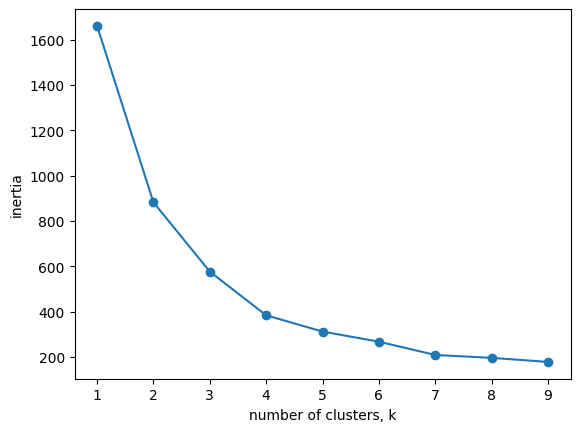

In [49]:
ks = range(1,10)
inertias = []
for k in ks:
     # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(scaled_samples)

     # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


From the graph, the inertia drops steeply until around 𝑘 = 3 or 𝑘 = 4, after which the decrease becomes more gradual.
The "elbow" appears to be at 𝑘 = 3 or 𝑘 = 4, making either a reasonable choice for 𝒏_𝒄𝒍𝒖𝒔𝒕𝒆𝒓𝒔.

In [52]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
model.fit(samples)

labels = model.predict(samples)

In [53]:
# Create a list containing the names of the numeric (non-binary) columns of penguins_df DataFrame, storing as numeric_columns
non_numerical_mask = penguins_df.dtypes=='object'
numerical_columns = penguins_df.columns[~non_numerical_mask].to_list()
numerical_columns

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [54]:
# Add a new column named label to your dataset, with values equal to the kmeans.labels_ attribute.
penguins_df['label']=model.labels_

In [55]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
3,36.7,19.3,193.0,3450.0,FEMALE,0
4,39.3,20.6,190.0,3650.0,MALE,0


#### The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster.
#### stat_penguins should not include any non-numeric columns.

In [56]:
stat_penguins = penguins_df.groupby('label')[numerical_columns].agg('mean')
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,41.392771,18.062651,190.457831,3536.445783
1,45.105714,16.588571,205.933333,4513.333333
2,49.306557,15.649180,221.065574,5501.639344


In [40]:
# Summary
stat_penguins = penguins_df.groupby('label')[numerical_columns].agg('mean')
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.502000,18.445000,195.460000,3953.500000
1,40.375248,17.773267,188.633663,3347.029703
2,49.674545,15.725455,221.709091,5548.181818
3,45.457895,15.661842,209.631579,4710.526316


### Observations:
    - 𝐂𝐥𝐮𝐬𝐭𝐞𝐫 𝟎 has the 𝒔𝒎𝒂𝒍𝒍𝒆𝒔𝒕 𝒃𝒐𝒅𝒚 𝒔𝒊𝒛𝒆, 𝒔𝒉𝒐𝒓𝒕𝒆𝒔𝒕 𝒄𝒖𝒍𝒎𝒆𝒏, 𝒂𝒏𝒅 𝒔𝒉𝒐𝒓𝒕𝒆𝒔𝒕 𝒇𝒍𝒊𝒑𝒑𝒆𝒓𝒔, but 𝐭𝐡𝐞 𝐝𝐞𝐞𝐩𝐞𝐬𝐭 𝐜𝐮𝐥𝐦𝐞𝐧 𝐝𝐞𝐩𝐭𝐡—𝐩𝐨𝐬𝐬𝐢𝐛𝐥𝐲 a species adapted for stronger biting.
    - 𝐂𝐥𝐮𝐬𝐭𝐞𝐫 𝟏 represents 𝒂 𝒎𝒆𝒅𝒊𝒖𝒎-𝒔𝒊𝒛𝒆𝒅 𝒈𝒓𝒐𝒖𝒑, with moderate measurements across all features.
    - 𝐂𝐥𝐮𝐬𝐭𝐞𝐫 𝟐 consists of the 𝒍𝒂𝒓𝒈𝒆𝒔𝒕 𝒊𝒏𝒅𝒊𝒗𝒊𝒅𝒖𝒂𝒍𝒔, 𝒉𝒂𝒗𝒊𝒏𝒈 𝒕𝒉𝒆 𝒍𝒐𝒏𝒈𝒆𝒔𝒕 𝒇𝒍𝒊𝒑𝒑𝒆𝒓𝒔, 𝒍𝒐𝒏𝒈𝒆𝒔𝒕 𝒄𝒖𝒍𝒎𝒆𝒏, 𝒂𝒏𝒅 𝒉𝒆𝒂𝒗𝒊𝒆𝒔𝒕 𝒃𝒐𝒅𝒚 𝒎𝒂𝒔𝒔, indicating 𝒃𝒊𝒈𝒈𝒆𝒓 𝒔𝒑𝒆𝒄𝒊𝒆𝒔.